<a href="https://colab.research.google.com/github/tusharpamnani/DL-Lab/blob/main/DL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5A. Generate 61 points for target = sin x , where x ∈ [−3, 3]. Use this dataset to train two layer neural networks
using gradient descent learning algorithm. Draw two curves with different colours, for target and output(y) of
the trained neural network.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# defining ReLU activation function
def relu_func(z):
  return np.maximum(0, z)

In [4]:
x = np.linspace(-3, 3, 61)
y_true = np.sin(x) # actual y (target)
# initializing the random number generator
np.random.seed(42)

In [5]:
# defining size of each layer
input_size = 1
hidden_size = 10
output_size = 1

In [6]:
# initially weights (W1 & W2) are random and bias (b1 & b2) are zero
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [7]:
learning_rate = 0.01
epochs = 1000

In [9]:
for epoch in range(epochs):
  # forward pass
  Z1 = np.dot(x.reshape(-1, 1), W1) + b1
  A1 = relu_func(Z1)
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2.flatten() # predicted y
# calculating the loss
loss = np.mean((y_pred - y_true)**2)

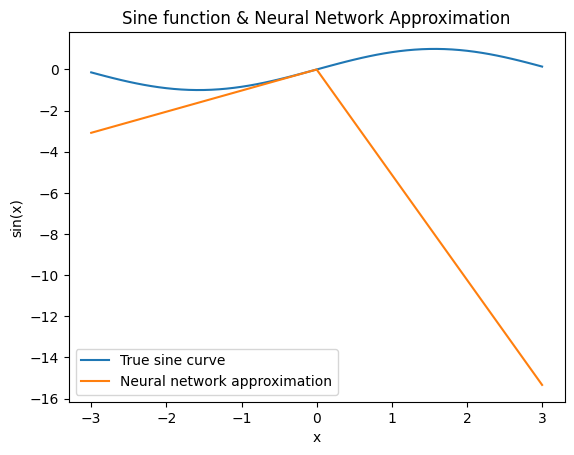

In [10]:
plt.plot(x, y_true, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine function & Neural Network Approximation')
plt.show()

5B. Use MNIST dataset to train neural networks using gradient descent learning algorithm.Experiments with  various Architectures of neural networks, and with different activation functions for hidden and output layers.

In [11]:
# loading the MNIST dataset from keras.datasets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape))
  for _ in range(hidden_layers):
    model.add(layers.Dense(neurons, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [14]:
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# fitting the model on the training dataset
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6939 - loss: 1.1276 - val_accuracy: 0.9160 - val_loss: 0.3064
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8996 - loss: 0.3458 - val_accuracy: 0.9285 - val_loss: 0.2430
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2841 - val_accuracy: 0.9413 - val_loss: 0.2086
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9294 - loss: 0.2471 - val_accuracy: 0.9498 - val_loss: 0.1815
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9391 - loss: 0.2131 - val_accuracy: 0.9552 - val_loss: 0.1646
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9430 - loss: 0.1954 - val_accuracy: 0.9575 - val_loss: 0.1557
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9487 - loss: 0.1765 - val_accuracy: 0.9622 - val_loss: 0.1413
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9531 - loss: 0.1613 

In [16]:
# model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9526 - loss: 0.1576
Test Accuracy: 0.9583


In [17]:
model2 = create_model(hidden_layers=2, neurons=64, activation='sigmoid', input_shape=(28, 28))
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# fitting the model on the training dataset
history2 = model2.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1997 - loss: 2.2759 - val_accuracy: 0.4675 - val_loss: 2.1053
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5273 - loss: 2.0070 - val_accuracy: 0.6307 - val_loss: 1.5510
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6487 - loss: 1.4372 - val_accuracy: 0.7440 - val_loss: 1.0655
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7401 - loss: 1.0342 - val_accuracy: 0.8230 - val_loss: 0.8052
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7927 - loss: 0.8201 - val_accuracy: 0.8568 - val_loss: 0.6458
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8315 - loss: 0.6816 - val_accuracy: 0.8753 - val_loss: 0.5422
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8490 - loss: 0.5897 - val_accuracy: 0.8877 - val_loss: 0.4730
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8623 - loss: 0.5244 -

In [19]:
# model evaluation
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8746 - loss: 0.4554
Test Accuracy: 0.8906


In [20]:
model3 = create_model(hidden_layers=2, neurons=64, activation='tanh', input_shape=(28, 28))
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# fitting the model on the training dataset
history3 = model3.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7324 - loss: 1.0379 - val_accuracy: 0.9177 - val_loss: 0.3319
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8985 - loss: 0.3688 - val_accuracy: 0.9280 - val_loss: 0.2664
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9120 - loss: 0.3068 - val_accuracy: 0.9363 - val_loss: 0.2313
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9225 - loss: 0.2715 - val_accuracy: 0.9435 - val_loss: 0.2074
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9326 - loss: 0.2398 - val_accuracy: 0.9488 - val_loss: 0.1902
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9365 - loss: 0.2185 - val_accuracy: 0.9527 - val_loss: 0.1741
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.2007 - val_accuracy: 0.9560 - val_loss: 0.1623
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9476 - loss: 0.1823 - 

In [22]:
# model evaluation
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy3:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.1809
Test Accuracy: 0.9541
